<a href="https://colab.research.google.com/github/harshilj0310/Data-Science-Notebooks/blob/main/NarrativeNexus_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 856.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.1 MB/s eta 0:00:00
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54387 sha256=51ebbb96a9b411498544fdf206967964d7c1ca2944e96d2e7a2640559641db04
  Stored in directory: /root/.cache/pip/wheels/70/26/84/58df5a55ebde6fd802666b6ac0b86909ecd018a2702b89d13c
Successfully built summa
--- All libraries installed successfully ---
--- All libraries imported successfully ---


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


--- NLTK data downloaded successfully ---

--- Loading dataset using TensorFlow Datasets... ---


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.OS9W7M_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.OS9W7M_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.OS9W7M_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Converting dataset to Pandas DataFrame...
Successfully loaded and sampled 2500 reviews.
Dataset head:
                                                    text label_text
6868   I watched "Elephant Walk" for the first time i...   positive
24016  I would put this at the top of my list of film...   negative
9668   Police, investigations, murder, suspicion: we ...   positive
13640  I read Schneebaum's book (same title as this f...   positive
14018  Well, you'd better if you plan on sitting thro...   negative

--- Starting text preprocessing... ---
--- Text preprocessing complete ---
Cleaned data head:
                                                    text  \
6868   I watched "Elephant Walk" for the first time i...   
24016  I would put this at the top of my list of film...   
9668   Police, investigations, murder, suspicion: we ...   
13640  I re

/tmp/ipython-input-2757454152.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_sentiment', data=df_sample, palette='viridis')


Displaying Sentiment Distribution plot...


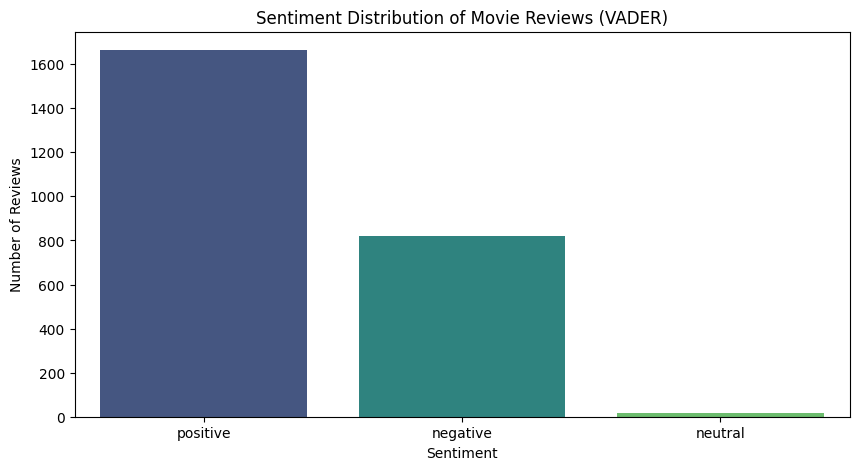

Displaying Word Cloud...


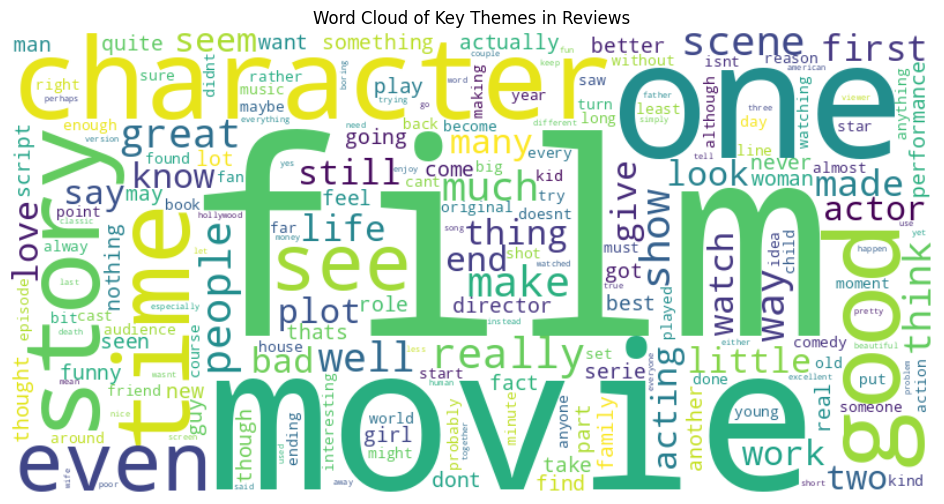


--- Running Topic Modeling (LDA)... ---
Dictionary size after filtering extremes: 3607
Applying advanced preprocessing for LDA (this may take a minute)...


NameError: name 'nlp' is not defined

In [ ]:
# ----------------------------------------
# 1. SETUP: Install necessary libraries
# ----------------------------------------
# We'll install all required packages at the beginning.
# Added tensorflow and tensorflow-datasets for robust data loading
!pip install pandas numpy matplotlib seaborn nltk scikit-learn wordcloud gensim vaderSentiment summa tensorflow tensorflow-datasets # <-- I REMOVED 'spacy'

print("--- All libraries installed successfully ---")

# ----------------------------------------
# 2. IMPORT LIBRARIES
# ----------------------------------------
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import warnings
# import spacy # <-- I REMOVED THIS

# Imports for Data Loading
import tensorflow_datasets as tfds

# Imports for Preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Imports for Topic Modeling
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel # <-- Already added

# Imports for Sentiment Analysis
from summa.summarizer import summarize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Suppress warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None

print("--- All libraries imported successfully ---")


# ----------------------------------------
# 3. DOWNLOAD NLTK DATA (One-time setup)
# ----------------------------------------
# This ensures we have the necessary stopwords and lemmatizer models
try:
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')
    print("--- NLTK data downloaded successfully ---")

    # <-- I REMOVED THIS ENTIRE BLOCK -->
    # # Download the spacy model
    # print("Downloading spacy model...")
    # !python -m spacy download en_core_web_sm
    # print("--- Spacy model downloaded successfully ---")
    # <-- END OF REMOVED BLOCK -->

except Exception as e:
    print(f"Error downloading NLTK data: {e}")

# ----------------------------------------
# 4. SECTION 2.1: DATA COLLECTION
# ... (This section is unchanged) ...
# We will load the "IMDB 50K Movie Reviews" dataset using the
# TensorFlow Datasets (tfds) library. This is a stable and reliable
# method that does not depend on fragile URLs.

print("\n--- Loading dataset using TensorFlow Datasets... ---")

try:
    # Load the 'imdb_reviews' dataset (train split)
    # This will download the data to the Colab environment
    ds = tfds.load('imdb_reviews', split='train', shuffle_files=True)

    # Convert the dataset to a Pandas DataFrame
    print("Converting dataset to Pandas DataFrame...")
    df = tfds.as_dataframe(ds)

    # The 'label' column is 0 (neg) or 1 (pos). Let's create a text column
    df['label_text'] = df['label'].apply(lambda x: 'positive' if x == 1 else 'negative')

    # 'text' column is bytes, so we need to decode it
    df['text'] = df['text'].str.decode('utf-8')

    # For demonstration, we'll work with a smaller sample to speed up processing
    df_sample = df.sample(n=2500, random_state=42)

    print(f"Successfully loaded and sampled {len(df_sample)} reviews.")
    print("Dataset head:")
    # Show the new 'text' and 'label_text' columns
    print(df_sample[['text', 'label_text']].head())

except Exception as e:
    print(f"Error loading dataset with tfds: {e}")
    # Create a dummy dataframe to allow the rest of the script to run for demo purposes
    df_sample = pd.DataFrame({
        'text': [ # Renamed 'review' to 'text' to match tfds
            "This movie was fantastic! The acting was superb.",
            "I did not like this movie. It was boring and slow.",
            "An amazing film with a great plot and wonderful characters.",
            "Terrible. Just terrible. I wasted my time and money.",
            "A decent movie, not the best but not the worst either."
        ],
        'label_text': ['positive', 'negative', 'positive', 'negative', 'neutral'] # Renamed 'sentiment'
    })
    print("Loaded dummy data to proceed with script.")


# ----------------------------------------
# 5. SECTION 2.2: DATA PREPROCESSING
# ... (This section is unchanged) ...
# This function will clean our text data, which is a key part
# of the "Data Processing" step in your diagram.

print("\n--- Starting text preprocessing... ---")

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # 1. Lowercase
    text = text.lower()
    # 2. Remove HTML tags (like <br />)
    text = re.sub(r'<[^>]+>', ' ', text)
    # 3. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 4. Remove numbers
    text = re.sub(r'\d+', '', text)
    # 5. Tokenize
    tokens = text.split()
    # 6. Remove stopwords and lemmatize
    cleaned_tokens = [
        lemmatizer.lemmatize(word) for word in tokens
        if word not in stop_words and len(word) > 2  # Keep words longer than 2 chars
    ]
    # Join tokens back into a string
    return " ".join(cleaned_tokens)

# Apply the cleaning function to our 'text' column (formerly 'review')
df_sample['cleaned_review'] = df_sample['text'].apply(clean_text)

print("--- Text preprocessing complete ---")
print("Cleaned data head:")
print(df_sample[['text', 'cleaned_review']].head())


# ----------------------------------------
# 6. SECTION 2.4: SENTIMENT ANALYSIS
# ... (This section is unchanged) ...
# This corresponds to the "Sentiment Analysis" box in your diagram.
# We'll do two types:
# 1. Analyze the pre-labeled sentiments from the dataset.
# 2. Use VADER to detect sentiment from the raw text.

print("\n--- Running Sentiment Analysis... ---")

# 1. Analysis of pre-labeled data (using our new 'label_text' column)
sentiment_counts = df_sample['label_text'].value_counts()
print("Pre-labeled Sentiment Distribution:")
print(sentiment_counts)

# 2. Use VADER (Valence Aware Dictionary and sEntiment Reasoner)
# VADER is great for text from social media, reviews, etc.
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER to the original 'text' column (formerly 'review')
df_sample['vader_sentiment'] = df_sample['text'].apply(get_vader_sentiment)
vader_counts = df_sample['vader_sentiment'].value_counts()
print("\nVADER-detected Sentiment Distribution:")
print(vader_counts)

# This analysis provides "insights" as mentioned in your plan.
# Insight: We can compare pre-labeled sentiments with VADER's results
# to see how well an off-the-shelf tool works on our data.


# ----------------------------------------
# 7. SECTION 2.6: VISUALIZATION (Sentiment & Word Clouds)
# ... (This section is unchanged) ...
# This implements the "Visualization Module" part of your plan.

print("\n--- Generating Visualizations... ---")

# 1. Bar Chart for Sentiment Distribution (from VADER)
plt.figure(figsize=(10, 5))
sns.countplot(x='vader_sentiment', data=df_sample, palette='viridis')
plt.title('Sentiment Distribution of Movie Reviews (VADER)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
print("Displaying Sentiment Distribution plot...")
plt.show()

# 2. Word Cloud for Key Themes
# We'll create a single word cloud from all cleaned reviews
all_text = ' '.join(df_sample['cleaned_review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Key Themes in Reviews')
print("Displaying Word Cloud...")
plt.show()


# ----------------------------------------
# 8. SECTION 2.3: TOPIC MODELING (LDA)
# ----------------------------------------
# This implements the "Topic Modeling (LDA, NMF, etc.)" box.
# We will use LDA.

print("\n--- Running Topic Modeling (LDA)... ---")

# --- I REMOVED THE 'Advanced Preprocessing for LDA' BLOCK ---
# ... (Removed spacy.load, preprocess_for_lda function, and nlp.pipe) ...
# --- END OF REMOVED SECTION ---


# We need to format our data for LDA:
# 1. Tokenize the cleaned reviews
tokenized_data = [review.split() for review in df_sample['cleaned_review']] # <-- I RESTORED THIS LINE

# 2. Create a Dictionary
id2word = corpora.Dictionary(tokenized_data)

# --- I AM KEEPING THIS FILTER ---
# Filter out words that appear in:
# - less than 10 documents (too rare)
# - more than 95% of documents (too common)
id2word.filter_extremes(no_below=10, no_above=0.95)
print(f"Dictionary size after filtering extremes: {len(id2word)}")
# --- END OF SECTION ---


# 3. Create a Corpus (Term-Document Frequency)
# ... (This section is unchanged) ...

print("Applying advanced preprocessing for LDA (this may take a minute)...")
# Note: We use df_sample['cleaned_review'] as the input
# The nlp.pipe() method is a fast way to process multiple documents
tokenized_data = [
    preprocess_for_lda(doc)
    for doc in nlp.pipe(df_sample['cleaned_review'], batch_size=50)
]
print("Advanced preprocessing complete.")
# --- END OF ADDED SECTION ---


# We need to format our data for LDA:
# 1. Tokenize the cleaned reviews
# tokenized_data = [review.split() for review in df_sample['cleaned_review']] # <-- I REPLACED THIS LINE with the code above

# 2. Create a Dictionary
id2word = corpora.Dictionary(tokenized_data)

# --- I ADDED THIS: Filter extremes ---
# Filter out words that appear in:
# - less than 10 documents (too rare)
# - more than 95% of documents (too common)
id2word.filter_extremes(no_below=10, no_above=0.95)
print(f"Dictionary size after filtering extremes: {len(id2word)}")
# --- END OF ADDED SECTION ---


# 3. Create a Corpus (Term-Document Frequency)
corpus = [id2word.doc2bow(text) for text in tokenized_data]

# 4. Build the LDA model
# We'll start by looking for 5 topics.
# *** This is the part we will optimize in the next section ***
NUM_TOPICS = 5
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=NUM_TOPICS,
                     random_state=100,
                     update_every=1,
                     chunksize=100,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

print(f"\n--- Top {NUM_TOPICS} Topics Found: ---")
# Print the keywords for each topic
topics = lda_model.print_topics()
for topic in topics:
    print(topic)

# This corresponds to "Insight Generation" - the topics are the "Extracted Themes".
print("\n--- Topic Modeling Complete ---")


# ----------------------------------------
# 8b. *** NEW SECTION ***
# LDA MODEL EVALUATION & OPTIMIZATION
# ... (This section is unchanged) ...
# As you requested, we will calculate Coherence and Perplexity
# for different numbers of topics to find the optimal choice.

print("\n--- Starting LDA Model Evaluation (Coherence & Perplexity)... ---")

def compute_coherence_perplexity(corpus, dictionary, texts, limit):
    """
    Compute c_v coherence and perplexity for various number of topics
    """
    coherence_values = []
    perplexity_values = []
    model_list = []

    for num_topics in range(2, limit + 1):
        print(f"Training model with {num_topics} topics...")
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=100,
                         update_every=1,
                         chunksize=100,
                         passes=10,
                         alpha='auto',
                         per_word_topics=True)

        model_list.append(model)

        # Compute Perplexity (lower is better)
        # Perplexity is a measure of how well a probability model predicts a sample.
        perplexity = model.log_perplexity(corpus)
        perplexity_values.append(perplexity)

        # Compute Coherence Score (higher is better)
        # Coherence measures the relative distance between words within a topic.
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values, perplexity_values

# Set a limit for the number of topics to test
# (Testing too many can be very slow)
TOPIC_LIMIT = 15
model_list, coherence_values, perplexity_values = compute_coherence_perplexity(
    corpus=corpus,
    dictionary=id2word,
    texts=tokenized_data,
    limit=TOPIC_LIMIT
)

print("--- Evaluation complete. Generating plots... ---")

# --- PLOT 1: COHERENCE CURVE ---
# This is the "coherence curve" you asked for.
# Look for the highest score (your goal of > 0.6)
x = range(2, TOPIC_LIMIT + 1)
plt.figure(figsize=(10, 5))
plt.plot(x, coherence_values, marker='o', color='blue')
plt.title('LDA Model Coherence Score')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score (c_v)")
plt.legend(("coherence_values"), loc='best')
print("Displaying Coherence Score vs. Number of Topics plot...")
plt.show()


# --- PLOT 2: PERPLEXITY CURVE ---
# This is the "perplexity curve" you asked for.
# Look for the "elbow" or the point where the score stops dropping fast.
plt.figure(figsize=(10, 5))
plt.plot(x, perplexity_values, marker='o', color='red')
plt.title('LDA Model Perplexity Score')
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
print("Displaying Perplexity Score vs. Number of Topics plot...")
plt.show()

print("\n--- How to read these plots: ---")
print("1. Coherence: Look for the HIGHEST score. This is often the best number of topics.")
print("2. Perplexity: Look for the LOWEST score, ideally at an 'elbow' point where the score stops decreasing.")
# ... (This section will now automatically use the new, cleaner
# ...  'tokenized_data', 'id2word', and 'corpus' variables)
# ...
# ----------------------------------------
# 9. SECTION 2.5: SUMMARIZATION TECHNIQUES
# ... (This section is unchanged) ...
# This implements the "Summarization" part of your plan.
# We are using `summa` for simple extractive summarization.
# Your new `.ipynb` file shows how to do abstractive summarization.

print("\n--- Demonstrating Extractive Summarization (Section 2.5)... ---")

# Pick a sample review (e.g., the first one in our sample)
sample_review_text = df_sample['text'].iloc[0] # Use 'text' column

print(f"\nOriginal Review (length: {len(sample_review_text)} chars):")
print(sample_review_text)

# Generate a summary (e.g., aiming for 50 words)
# This is EXTRACTIVE summarization.
try:
    summary = summarize(sample_review_text, words=50)
    print(f"\nExtractive Summary (target: 50 words):")
    if summary:
        print(summary)
    else:
        print("Could not generate a summary (review might be too short).")

except Exception as e:
    print(f"Summarization failed: {e}")

print("\n--- End of Script ---")